# Intro
In this notebook the Linux kernel evolution is studied. As heart of all linux distributions is important to know who are the top contributors and the number of commits over the years.
For this analysis a Git log with the following contente is used:

<li><code>timestamp</code>: the time of the commit as a UNIX timestamp in seconds since 1970-01-01 00:00:00 (Git log placeholder "<code>%at</code>")</li>
<li><code>author</code>: the name of the author that performed the commit (Git log placeholder "<code>%aN</code>")</li>
</ul>
<p>The columns are separated by the number sign <code>#</code>. The complete dataset is in the <code>datasets/</code> directory. It is a <code>gz</code>-compressed csv file named <code>git_log.gz</code>.</p>

# Reading the Dataset

In [1]:
# importing pandas module
import pandas as pd

# Reading in the log file
git_log = pd.read_csv('datasets/git_log.gz',sep='#',encoding='latin-1',header=None,names=['timestamp','author'])

# inspecting the file's header
git_log.head(5)

,timestamp,author
0,1502826583,Linus Torvalds
1,1501749089,Adrian Hunter
2,1501749088,Adrian Hunter
3,1501882480,Kees Cook
4,1497271395,Rob Clark


# Overview of the data

The dataset contains information about the commits and authors of the linux kernel over the past 13 years. As a first step the number of commits and authors is reviewed.

In [2]:
# calculating number of commits
number_of_commits = git_log['timestamp'].count()

# calculating number of authors
number_of_authors = git_log['author'].value_counts(dropna=True).count()

# printing out the results
print("%s authors committed %s code changes." % (number_of_authors, number_of_commits))

17385 authors committed 699071 code changes.


# Top 10 contributors

In [3]:
top_10_authors = git_log['author'].value_counts(sort=True, ascending=False).head(10)
top_10_authors

Linus Torvalds           23361
David S. Miller           9106
Mark Brown                6802
Takashi Iwai              6209
Al Viro                   6006
H Hartley Sweeten         5938
Ingo Molnar               5344
Mauro Carvalho Chehab     5204
Arnd Bergmann             4890
Greg Kroah-Hartman        4580
Name: author, dtype: int64

# Wrangling the data
For the study, is necessary to visualize the contributions over time. For this, the information in the timestamp is column is used to create a time series-based column.

In [4]:
# converting the timestamp column
git_log['timestamp']=pd.to_datetime(git_log['timestamp'], unit="s")

# summarizing the converted timestamp column
git_log['timestamp'].describe()

count                  699071
unique                 668448
top       2008-09-04 05:30:19
freq                       99
first     1970-01-01 00:00:01
last      2037-04-25 08:08:26
Name: timestamp, dtype: object

# Treating wrong timestamps
As it is seen from the results above, some contributors had their operating system's time incorrectly set when they committed to the repository. The timestamp column is cleaned by dropping the rows with the incorrect timestamps.

In [5]:
# determining the first real commit timestamp
first_commit_timestamp = git_log['timestamp'].iloc[-1]

# determining the last sensible commit timestamp at the last date in the DF 
last_commit_timestamp = pd.to_datetime('2018')

# filtering out wrong timestamps
corrected_log=git_log[(git_log['timestamp']>=first_commit_timestamp) & (git_log['timestamp']<=last_commit_timestamp)]

# summarizing the corrected timestamp column
corrected_log['timestamp'].describe()

count                  698569
unique                 667977
top       2008-09-04 05:30:19
freq                       99
first     2005-04-16 22:20:36
last      2017-10-03 12:57:00
Name: timestamp, dtype: object

# Grouping commits per year

In [6]:
# Counting the number of commits per year
commits_per_year=corrected_log.groupby(pd.Grouper(key='timestamp',freq='AS')).count()

# Listing the first rows
commits_per_year.head()

,author
timestamp,
2005-01-01,16229
2006-01-01,29255
2007-01-01,33759
2008-01-01,48847
2009-01-01,52572


# Visualizing the history of Linux

Text(0, 0.5, 'No. of Commits')

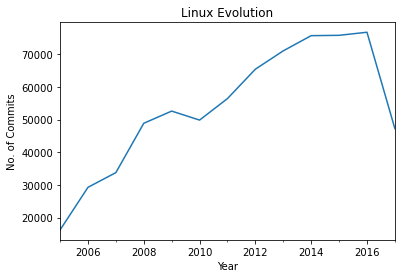

In [7]:
# Setting up plotting in Jupyter notebooks
%matplotlib inline

# plot the data
plot = commits_per_year.plot(kind='line',title='Linux Evolution',legend=False)
plot.set_xlabel('Year')
plot.set_ylabel('No. of Commits')



As saw in the graphic the year with the most commits is 2016